<a href="https://colab.research.google.com/github/mo-9/OCR/blob/main/PaddleOCR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple


Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 689.6 MB 18 kB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.3.3 which is incompatible.


In [2]:
!pip install paddleocr


     |████████████████████████████████| 239 kB 10.9 MB/s 
     |████████████████████████████████| 123 kB 56.1 MB/s 
     |████████████████████████████████| 948 kB 23.0 MB/s 
     |████████████████████████████████| 2.7 MB 39.8 MB/s 
     |████████████████████████████████| 12.5 MB 16 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 55.7 MB 14 kB/s 
     |████████████████████████████████| 404 kB 45.8 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 191 kB 52.6 MB/s 
     |████████████████████████████████| 197 kB 46.8 MB/s 
     |████████████████████████████████| 2.0 MB 35.7 MB/s 
     |████████████████████████████████| 41 kB 442 kB/s 
     |████████████████████████████████| 68 kB 6.6 MB/s 
     |████████████████████████████████| 1.9 MB 40.2 MB/s 
     |████████████████████████████████| 636 kB 46.4 MB/s 
     |████████████████████████████████| 5.3 MB 39.2 MB/s 
     |██████████████████

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR


Cloning into 'PaddleOCR'...
remote: Enumerating objects: 23110, done.
remote: Counting objects: 100% (2456/2456), done.
remote: Compressing objects: 100% (941/941), done.
remote: Total 23110 (delta 1713), reused 2142 (delta 1508), pack-reused 20654
Receiving objects: 100% (23110/23110), 159.79 MiB | 26.67 MiB/s, done.
Resolving deltas: 100% (15638/15638), done.


In [4]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

/usr/local/lib/python3.7/dist-packages/pooch/utils.py:53: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  warnings.warn(message, DeprecationWarning)


In [5]:
ocr_model = PaddleOCR(lang='en')


[2021/10/02 12:43:23] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/02 12:43:23] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/02 12:43:23] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:07<00:00, 409kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.3.0.1/ocr/rec/en/en_number_mobile_v2.0_rec_infer/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [00:22<00:00, 121kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:08<00:00, 173kiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='en', layout_path_model='l

In [6]:
img_path = os.path.join('.', '/content/ocr.jpg')
result = ocr_model.ocr(img_path)
result



[2021/10/02 12:44:34] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/10/02 12:44:46] root DEBUG: dt_boxes num : 4, elapse : 11.94141149520874
[2021/10/02 12:44:46] root DEBUG: rec_res num  : 4, elapse : 0.041903018951416016


[[[[128.0, 32.0], [213.0, 35.0], [213.0, 49.0], [127.0, 46.0]],
  ('Kecp drinks/sodo', 0.93595743)],
 [[[128.0, 81.0], [217.0, 81.0], [217.0, 99.0], [128.0, 99.0]],
  ('I70UNCES', 0.9237926)],
 [[[73.0, 139.0], [93.0, 139.0], [93.0, 146.0], [73.0, 146.0]],
  ('USE', 0.77887565)],
 [[[73.0, 152.0], [102.0, 152.0], [102.0, 163.0], [73.0, 163.0]],
  ('REUSA', 0.9723606)]]

In [7]:
for res in result:
    print(res[1][0])

Kecp drinks/sodo
I70UNCES
USE
REUSA


In [8]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [11]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')


In [12]:
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

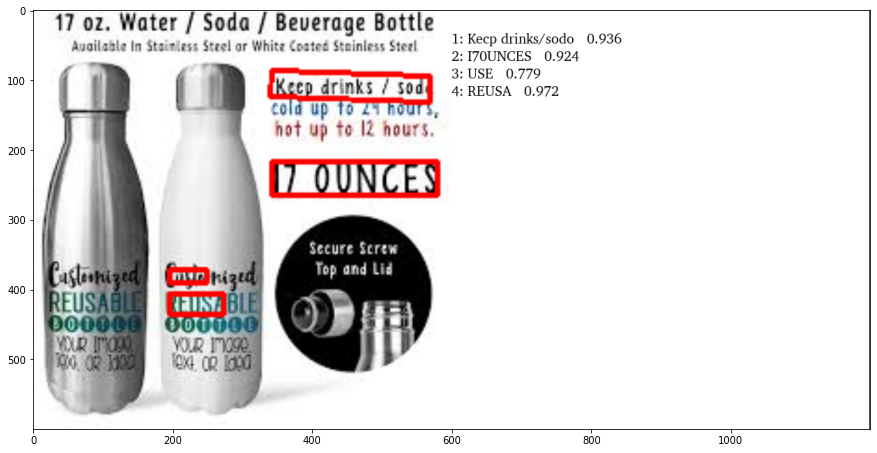

In [13]:
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated)

In [14]:
img.shape


(225, 225, 3)